# Dispersion and Dissipation

Copyright (C) 2010-2020 Luke Olson<br>
Copyright (C) 2020 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Consider
$$u_t+au_x=0$$
with periodic boundary conditions.

Set up parameters:

- `a` for the advection speed
- `lmbda` for the CFL number
- `dx` for the grid spacing in $x$
- `dt` for the time step
- `ks` for the range of wave numbers to consider

In [2]:
a = 1
lmbda = 0.6/a
dx = .1
dt = dx*lmbda
ks = np.arange(1,16)

Find $\omega(\kappa)$. Recall $\lambda = ah_t / h_x$.

ETBS:
$$ u_{k, \ell + 1} = \lambda u_{k - 1 , \ell} + (1 - \lambda) u_{k, \ell} $$

Recall:
* $r_k=\delta_{k,j}\Leftrightarrow\hat{\boldsymbol{r}} (\varphi) =  e^{- i \theta j}$.
* Index sign flip between matrix and Toeplitz vector.
* $e^{- i \omega (\kappa) h_t} = s (\kappa)$.

In [5]:
kappa = ks*dx
p_ETBS = 1
q_ETBS = lmbda*np.exp(-1j*kappa) + (1-lmbda)
s_ETBS = q_ETBS/p_ETBS

omega_ETBS = 1j*np.log(s_ETBS)/dt

Again recall $\lambda = ah_t / h_x$.

Lax-Wendroff:
$$
  u_{k, \ell + 1} - u_{k, \ell}
  = -\frac{\lambda}2 (u_{k + 1, \ell} - u_{k - 1, \ell}) +
  \frac{\lambda^2}{2} ( u_{k + 1, \ell} - 2 u_{k, \ell} + u_{k - 1, \ell})
$$

In [6]:
#clear
p_LW = 1
q_LW = (
    # u_{k,l}
    1 - 2*lmbda**2/2
    
    # u_{k+1,l}
    + np.exp(1j*kappa) * (-lmbda/2 + lmbda**2/2)
    
    # u_{k-1,l}
    + np.exp(-1j*kappa) * (lmbda/2 + lmbda**2/2)
    )
s_LW = q_LW/p_LW

omega_LW = 1j*np.log(s_LW)/dt

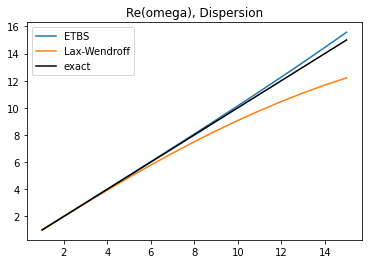

In [9]:
plt.plot(ks, omega_ETBS.real, label="ETBS")
plt.plot(ks, omega_LW.real, label="Lax-Wendroff")
plt.plot(ks, a*ks, color='black', label='exact')
plt.title("Re(omega), Dispersion")
plt.legend(loc="best")

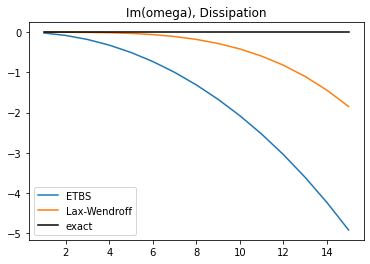

In [11]:
plt.plot( ks, omega_ETBS.imag, label="ETBS")
plt.plot( ks, omega_LW.imag, label="Lax-Wendroff")
plt.plot(ks, np.zeros_like(ks), color='black', label='exact')
plt.title("Im(omega), Dissipation")
plt.legend(loc="best")